# Testing 12 Technical Indicators With Machine Learning Predictions

In [1]:
import pandas as pd
df = pd.read_csv("/Users/veddarji0108/Downloads/CODING/EURUSD_Candlestick_1_D_ASK_05.05.2003-30.06.2021.csv")

#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail()

,Local time,open,high,low,close,volume
4729,24.06.2021 00:00:00.000 GMT+0300,1.19267,1.19565,1.19178,1.19322,85152.21000
4730,25.06.2021 00:00:00.000 GMT+0300,1.19322,1.19754,1.19264,1.19392,77837.64500
4731,28.06.2021 00:00:00.000 GMT+0300,1.19380,1.19447,1.19025,1.19260,85154.26000
4732,29.06.2021 00:00:00.000 GMT+0300,1.19297,1.19334,1.18779,1.18973,98898.57000
4733,30.06.2021 00:00:00.000 GMT+0300,1.18973,1.19092,1.18452,1.18589,4301.30191


In [6]:
import pandas_ta as pa
help(pa.macd)

Help on function macd in module pandas_ta.momentum.macd:

macd(close, fast=None, slow=None, signal=None, talib=None, offset=None, **kwargs)
    Moving Average Convergence Divergence (MACD)
    
    The MACD is a popular indicator to that is used to identify a security's trend.
    While APO and MACD are the same calculation, MACD also returns two more series
    called Signal and Histogram. The Signal is an EMA of MACD and the Histogram is
    the difference of MACD and Signal.
    
    Sources:
        https://www.tradingview.com/wiki/MACD_(Moving_Average_Convergence/Divergence)
        AS Mode: https://tr.tradingview.com/script/YFlKXHnP/
    
    Calculation:
        Default Inputs:
            fast=12, slow=26, signal=9
        EMA = Exponential Moving Average
        MACD = EMA(close, fast) - EMA(close, slow)
        Signal = EMA(MACD, signal)
        Histogram = MACD - Signal
    
        if asmode:
            MACD = MACD - Signal
            Signal = EMA(MACD, signal)
          

In [7]:
df["RSI"] = pa.rsi(df.close, length=16)
df["CCI"] = pa.cci(df.high, df.low, df.close, length=16)
df["AO"] = pa.ao(df.high, df.low)
df["MOM"] = pa.mom(df.close, length=16)
a = pa.macd(df.close)
df = df.join(a)
df["ATR"] = pa.atr(df.high, df.low, df.close, length=16)
df["BOP"] = pa.bop(df.open, df.high, df.low, df.close, length=16)
df["RVI"] = pa.rvi(df.close)
a = pa.dm(df.high, df.low, length=16)
df = df.join(a)
a = pa.stoch(df.high, df.low, df.close)
df = df.join(a)
a = pa.stochrsi(df.close, length=16)
df = df.join(a)
df["WPR"] = pa.willr(df.high, df.low, df.close, length=16)
#print(pa.macd(df.close))
#help(pa.mom)
#help(pa.cci)
# Get all candle patterns (This is the default behaviour)
#df1 = df.ta.cdl_pattern(name="all")
# Get only one pattern
#df = df.ta.cdl_pattern(name="doji")
# Get some patterns
#df = df.ta.cdl_pattern(name=["doji", "inside"])
#df

In [8]:
a = pa.macd(df.close)
a

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
4729,-0.005866,-0.002587,-0.003279
4730,-0.005903,-0.002100,-0.003804
4731,-0.005971,-0.001734,-0.004237
4732,-0.006184,-0.001558,-0.004626


In [9]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Local time             0
open                   0
high                   0
low                    0
close                  0
volume                 0
RSI                    0
CCI                    0
AO                     0
MOM                    0
MACD_12_26_9           0
MACDh_12_26_9          0
MACDs_12_26_9          0
ATR                    0
BOP                    0
RVI                    0
DMP_16                 0
DMN_16                 0
STOCHk_14_3_3          0
STOCHd_14_3_3          0
STOCHRSIk_16_14_3_3    0
STOCHRSId_16_14_3_3    0
WPR                    0
dtype: int64

In [10]:
df.reset_index(drop=True, inplace=True)
df.tail()

,Local time,open,high,low,close,volume,RSI,CCI,AO,MOM,...,ATR,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR
4696,24.06.2021 00:00:00.000 GMT+0300,1.19267,1.19565,1.19178,1.19322,85152.21000,37.882152,-76.428491,-0.021026,-0.02788,...,0.006776,0.142119,55.116307,0.001010,0.001967,23.291981,20.679150,30.079212,24.338382,-77.130529
4697,25.06.2021 00:00:00.000 GMT+0300,1.19322,1.19754,1.19264,1.19392,77837.64500,38.673197,-60.726942,-0.019139,-0.01894,...,0.006659,0.142857,63.045899,0.001065,0.001844,22.995325,22.796345,32.127166,29.390989,-75.242718
4698,28.06.2021 00:00:00.000 GMT+0300,1.19380,1.19447,1.19025,1.19260,85154.26000,37.707335,-65.586079,-0.017688,-0.02432,...,0.006506,-0.284360,52.823215,0.000999,0.001878,22.941388,23.076232,33.918424,32.041601,-78.802589
4699,29.06.2021 00:00:00.000 GMT+0300,1.19297,1.19334,1.18779,1.18973,98898.57000,35.642839,-70.279293,-0.017316,-0.02927,...,0.006447,-0.583784,45.085287,0.000936,0.001914,20.104802,22.013838,31.105425,32.383672,-86.542611
4700,30.06.2021 00:00:00.000 GMT+0300,1.18973,1.19092,1.18452,1.18589,4301.30191,33.059604,-82.849174,-0.017998,-0.03149,...,0.006444,-0.600000,39.177638,0.000878,0.001999,13.164635,18.736942,23.409925,29.477925,-96.327078


In [11]:
#Target flexible way
pipdiff = 200*1e-4 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL
def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
        #if ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 2 # bth limits exceeded
        #elif ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 3 #-1 downtrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
        #    trendcat[line] = 1 # uptrend
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 0 # no trend
        #elif ( (valueOpenLow >= (pipdiff/SLTPRatio)) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 5 # light trend down
        #elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= (pipdiff/SLTPRatio)) ):
        #    trendcat[line] = 4 # light trend up
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

<Axes: >

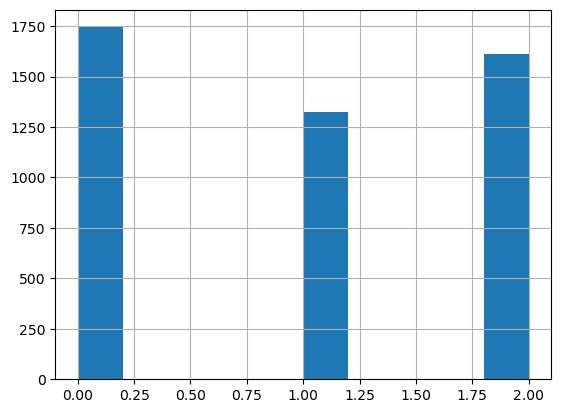

In [12]:
df['Target'] = mytarget(20, df)
df['Target'].hist()
#df.tail(20)
#df['Target'] = df['Target'].astype(int)

In [13]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,Local time,open,high,low,close,volume,RSI,CCI,AO,MOM,...,BOP,RVI,DMP_16,DMN_16,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_16_14_3_3,STOCHRSId_16_14_3_3,WPR,Target
4674,25.05.2021 00:00:00.000 GMT+0300,1.22169,1.22666,1.22117,1.22525,92860.7354,62.386778,123.454048,0.013957,0.01867,...,0.648452,66.757773,0.001874,0.000729,86.637412,84.589073,71.649994,65.363560,-5.028531,1.0
4675,26.05.2021 00:00:00.000 GMT+0300,1.22529,1.22631,1.21821,1.21930,94268.2250,56.869899,80.433248,0.013390,0.01776,...,-0.739506,58.928960,0.001757,0.000869,83.221057,85.351425,68.212071,68.663877,-26.248217,1.0
4676,27.05.2021 00:00:00.000 GMT+0300,1.21930,1.22153,1.21754,1.21961,88886.1450,57.080823,49.753842,0.012425,0.01909,...,0.077694,63.862767,0.001647,0.000856,75.949579,81.936016,55.378205,65.080090,-25.795829,1.0
4677,28.05.2021 00:00:00.000 GMT+0300,1.21961,1.22051,1.21328,1.21942,92872.1649,56.898908,13.586563,0.010990,0.01290,...,-0.026279,56.234709,0.001544,0.001069,66.449713,75.206783,36.215905,53.268727,-33.658763,1.0
4678,31.05.2021 00:00:00.000 GMT+0300,1.22014,1.22315,1.21835,1.22284,50250.5598,59.384191,69.837095,0.010261,0.00588,...,0.562500,61.641338,0.001613,0.001002,71.935534,71.444942,40.253948,43.949352,-17.759182,1.0


In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

attributes = ['RSI', 'CCI', 'AO', 'MOM', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ATR',
       'BOP', 'RVI', 'DMP_16', 'DMN_16', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'STOCHRSIk_16_14_3_3', 'STOCHRSId_16_14_3_3', 'WPR']

attributes = ['MACDs_12_26_9', 'ATR', 'DMP_16']

X = df[attributes]
y = df['Target']

train_pct_index = int(0.7 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 92.7328%
****Test Results****
Accuracy: 32.4074%


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix_train = confusion_matrix(y_train, pred_train)
matrix_test = confusion_matrix(y_test, pred_test)

print(matrix_train)
print(matrix_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)
#choices = [2, 0, -1, +1]
##choices = [2, 0, 3, +1]
print(model.get_booster().feature_names)

[[ 986   35   58]
 [  32  939   39]
 [  38   36 1112]]
[[187 241 237]
 [ 97  71 146]
 [149  79 197]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1079
         1.0       0.93      0.93      0.93      1010
         2.0       0.92      0.94      0.93      1186

    accuracy                           0.93      3275
   macro avg       0.93      0.93      0.93      3275
weighted avg       0.93      0.93      0.93      3275

              precision    recall  f1-score   support

         0.0       0.43      0.28      0.34       665
         1.0       0.18      0.23      0.20       314
         2.0       0.34      0.46      0.39       425

    accuracy                           0.32      1404
   macro avg       0.32      0.32      0.31      1404
weighted avg       0.35      0.32      0.33      1404

['MACDs_12_26_9', 'ATR', 'DMP_16']


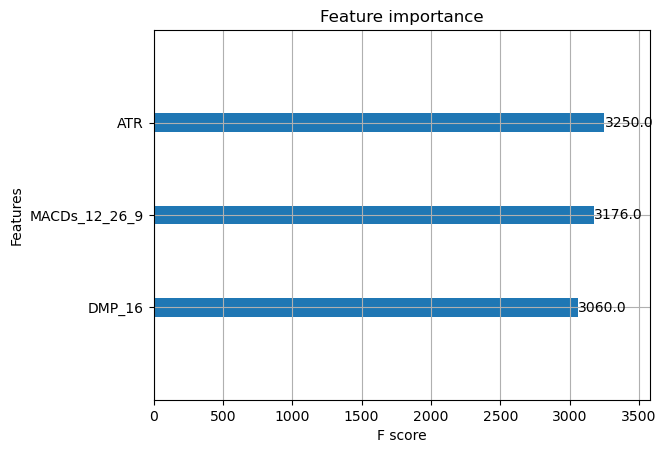

['MACDs_12_26_9', 'ATR', 'DMP_16']


In [16]:
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plot feature importance
plot_importance(model)
pyplot.show()
print(model.get_booster().feature_names)